In [97]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")


In [98]:
# load the dataset
df = pd.read_csv('zomato_data.csv')

In [99]:
# display basic information
print("Dataset Shape:", df.shape)
print("\nFirst five rows:")
df.head()

Dataset Shape: (148, 7)

First five rows:


,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [100]:
# Detailed Dataset Info

print(" DATASET INFORMATION ")
print(f"Shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")

print("\nDATA TYPES")
print(df.dtypes)

print("\nMISSING VALUES")
print(df.isnull().sum())

print("\nBASIC STATISTICS")
df.describe(include='all')

 DATASET INFORMATION 
Shape: (148, 7)
Columns: ['name', 'online_order', 'book_table', 'rate', 'votes', 'approx_cost(for two people)', 'listed_in(type)']

DATA TYPES
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
approx_cost(for two people)     int64
listed_in(type)                object
dtype: object

MISSING VALUES
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

BASIC STATISTICS


,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
count,148,148,148,148,148.000000,148.000000,148
unique,145,2,2,20,NaN,NaN,4
top,San Churro Cafe,No,No,3.8/5,NaN,NaN,Dining
freq,2,90,140,19,NaN,NaN,110
mean,NaN,NaN,NaN,NaN,264.810811,418.243243,NaN
std,NaN,NaN,NaN,NaN,653.676951,223.085098,NaN
min,NaN,NaN,NaN,NaN,0.000000,100.000000,NaN
25%,NaN,NaN,NaN,NaN,6.750000,200.000000,NaN
50%,NaN,NaN,NaN,NaN,43.500000,400.000000,NaN
75%,NaN,NaN,NaN,NaN,221.750000,600.000000,NaN


In [101]:
# inspect unique patterns
df['rate'].astype(str).unique()[:30]

# Clear and convert rate column
def clean_rate(x):
    if pd.isna(x):
        return np.nan
    s = str(x).strip()
    if s in ['-', 'NaN', 'nan', '']:
        return np.nan

    # try to extract a numeric prefix beofre '/'
    if '/' in s:
        try: 
            return float(s.split('/')[0].strip())
        except:
            return np.nan

    # or may be it's just a number already
    try :
        return float(s)
    except:
        return np.nan

df['rate_clean'] = df['rate'].apply(clean_rate)

print("\nAfter Conversion")
print(df['rate_clean'].head(10))


After Conversion
0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
5    3.8
6    3.6
7    4.6
8    4.0
9    4.2
Name: rate_clean, dtype: float64


In [102]:
## Handle Missing Values
# check for missing values in cleaned rate
print("Missing values in cleaned rate:", df['rate_clean'].isnull().sum())

# fill missing values with median
rate_median = df['rate_clean'].median()
df['rate_clean'].fillna(rate_median, inplace=True)

print("Missing values after cleaning:", df['rate_clean'].isnull().sum())

Missing values in cleaned rate: 0
Missing values after cleaning: 0


In [103]:
# covert cost to numeric
df['approx_cost_clean'] = pd.to_numeric(df['approx_cost(for two people)'], errors='coerce')

print("Cost column cleaned")
print(df[['approx_cost(for two people)', 'approx_cost_clean']].head(10))

Cost column cleaned
   approx_cost(for two people)  approx_cost_clean
0                          800                800
1                          800                800
2                          800                800
3                          300                300
4                          600                600
5                          600                600
6                          800                800
7                          600                600
8                          700                700
9                          550                550


In [44]:
print(" FINAL DATA QUALITY CHECK ")
df[['rate','rate_clean','approx_cost_for_two']].info()
df.isnull().sum().sort_values(ascending=False).head(20)
print(f"Total rows: {len(df)}")
print(f"Data types:\n{df.dtypes}")

 FINAL DATA QUALITY CHECK 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   rate                 148 non-null    object 
 1   rate_clean           148 non-null    float64
 2   approx_cost_for_two  148 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.6+ KB
Total rows: 148
Data types:
name                            object
online_order                    object
book_table                      object
rate                            object
votes                            int64
approx_cost(for two people)      int64
listed_in(type)                 object
rate_clean                     float64
approx_cost_clean                int64
approx_cost_for_two            float64
dtype: object


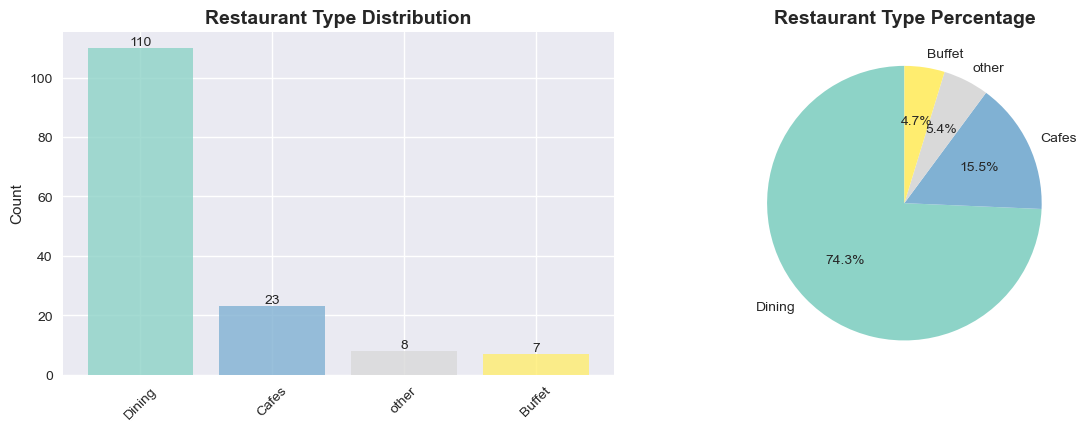

Most common restaurant type: Dining with 110 restaurants


In [104]:
## Data Analysis and Visualization

# Analysis 1- Create stunning visualization for restaurant types
plt.figure(figsize=(12, 8))

# Count plot
plt.subplot(2, 2, 1)
type_counts = df['listed_in(type)'].value_counts()
colors = plt.cm.Set3(np.linspace(0, 1, len(type_counts)))
bars = plt.bar(type_counts.index, type_counts.values, color=colors, alpha=0.8)
plt.title('Restaurant Type Distribution', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.ylabel('Count')

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height, f'{int(height)}', ha='center', va='bottom')

# Pie chart
plt.subplot(2, 2, 2)
plt.pie(type_counts.values, labels=type_counts.index, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Restaurant Type Percentage', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Conclusion
print(f"Most common restaurant type: {type_counts.index[0]} with {type_counts.values[0]} restaurants")


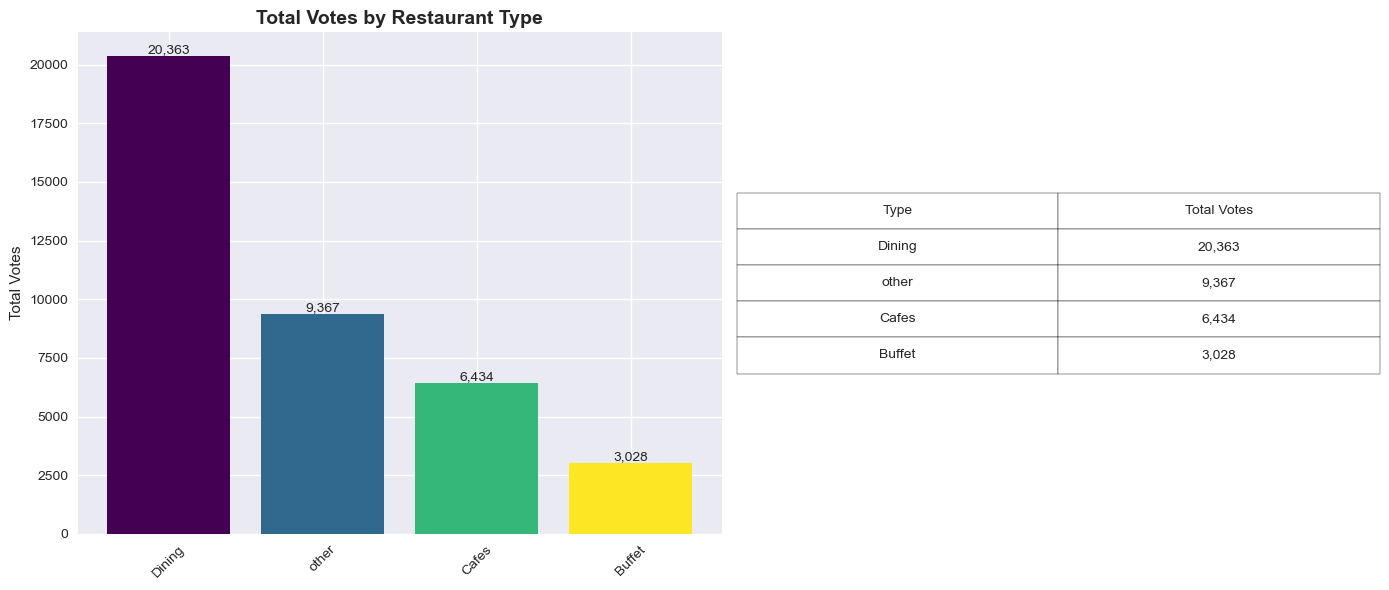

In [105]:
# Analysis 2- Create stunning visualization for total votes by restaurant types

plt.figure(figsize=(14, 6))

# Group data by type and calculate total votes
votes_by_type = df.groupby('listed_in(type)')['votes'].sum().sort_values(ascending=False)

# Bar plot
plt.subplot(1, 2, 1)
bars = plt.bar(votes_by_type.index, votes_by_type.values, color=plt.cm.viridis(np.linspace(0, 1, len(votes_by_type))))
plt.title('Total Votes by Restaurant Type', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.ylabel('Total Votes')

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height, f'{int(height):,}', ha='center', va='bottom', rotation=0)

# Table view
plt.subplot(1, 2, 2)
plt.axis('off')
table_data = [[k, f"{v:,}"] for k, v in votes_by_type.items()]
table = plt.table(cellText=table_data, colLabels=['Type', 'Total Votes'], cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2)

plt.tight_layout()
plt.show()

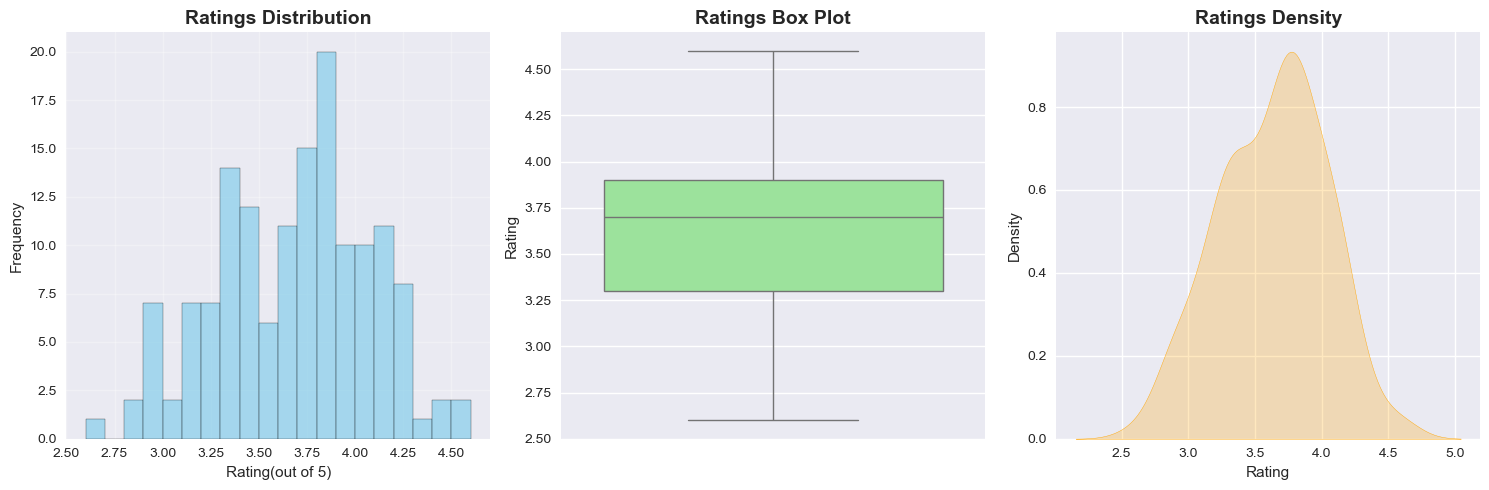

=== RATINGS STATISTICS ===
Average rating: 3.63
Median rating: 3.70
Rating range: 2.6 - 4.6
Most common rating range: 3.5 - 4.0


In [106]:
# Analysis 3- Create stunning visualization for Rating Distribution

plt.figure(figsize=(15, 5))

# Histogram
plt.subplot(1, 3, 1)
plt.hist(df['rate_clean'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Ratings Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Rating(out of 5)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

# Box plot
plt.subplot(1, 3, 2)
sns.boxplot(y=df['rate_clean'], color='lightgreen')
plt.title('Ratings Box Plot', fontsize=14, fontweight='bold')
plt.ylabel('Rating')

# Density plot
plt.subplot(1, 3, 3)
sns.kdeplot(df['rate_clean'], fill=True, color='orange')
plt.title('Ratings Density', fontsize=14, fontweight='bold')
plt.xlabel('Rating')

plt.tight_layout()
plt.show()

# Statistical summary
print("=== RATINGS STATISTICS ===")
print(f"Average rating: {df['rate_clean'].mean():.2f}")
print(f"Median rating: {df['rate_clean'].median():.2f}")
print(f"Rating range: {df['rate_clean'].min():.1f} - {df['rate_clean'].max():.1f}")
print(f"Most common rating range: 3.5 - 4.0")

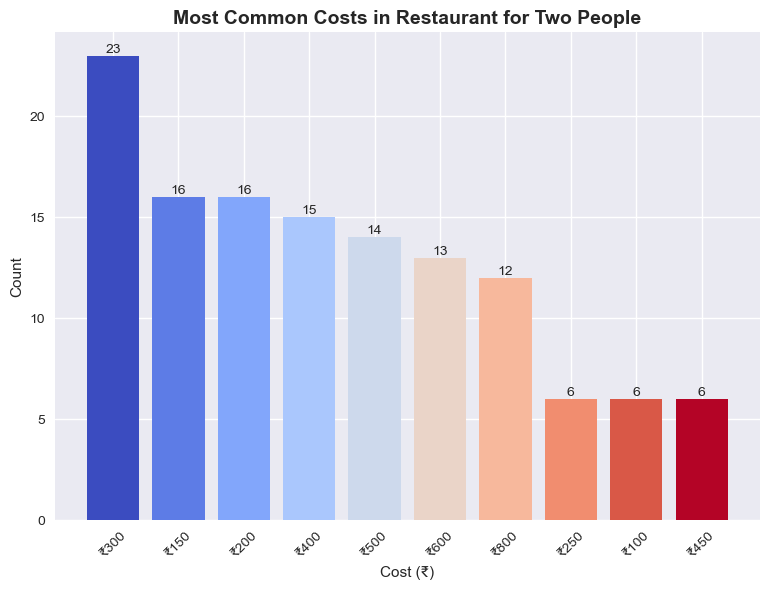

=== COST ANALYSIS ===
Average cost for two: ₹418.24
Median cost for two: ₹400.00
Most common cost: ₹300


In [107]:
# Analysis 4- Create stunning visualization for Restaurant Cost Preference for Couples

plt.figure(figsize=(15, 6))

# Cost distribution
plt.subplot(1, 2, 1)
cost_counts = df['approx_cost_clean'].value_counts().head(10)
bars = plt.bar(range(len(cost_counts)), cost_counts.values, color=plt.cm.coolwarm(np.linspace(0, 1, len(cost_counts))))
plt.title('Most Common Costs in Restaurant for Two People', fontsize=14, fontweight='bold')
plt.xlabel('Cost (₹)')
plt.ylabel('Count')
plt.xticks(range(len(cost_counts)), [f'₹{int(x)}' for x in cost_counts.index], rotation=45)

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height, f'{int(height)}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Cost statistics
print("=== COST ANALYSIS ===")
print(f"Average cost for two: ₹{df['approx_cost_clean'].mean():.2f}")
print(f"Median cost for two: ₹{df['approx_cost_clean'].median():.2f}")
print(f"Most common cost: ₹{cost_counts.index[0]}")

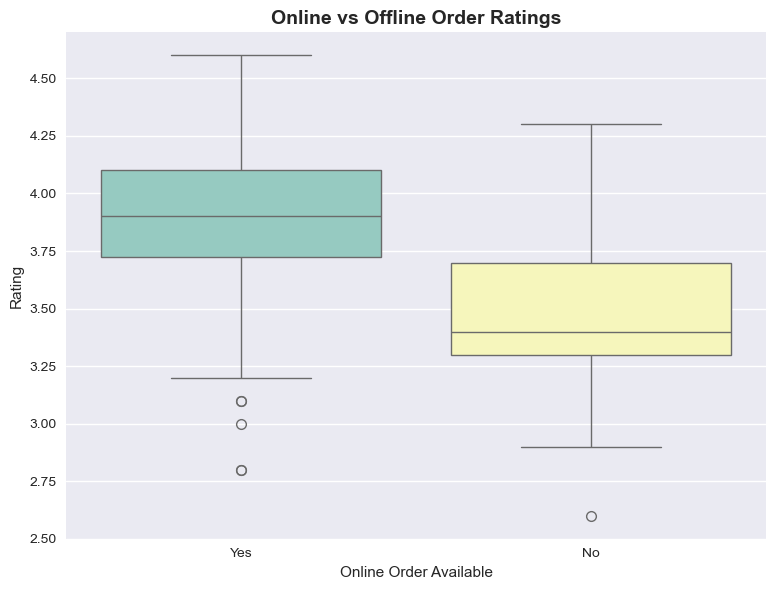

=== ONLINE VS OFFLINE RATING COMPARISON ===
Online orders - Average rating: 3.86
Offline orders - Average rating: 3.49
Difference: 0.37


In [81]:
# Analysis 5- Create stunning visualization for Online v/s Offline Order Ratings

plt.figure(figsize=(15, 6))

# Box plot comparison
plt.subplot(1, 2, 1)
sns.boxplot(x='online_order', y='rate_clean', data=df, palette='Set3')
plt.title('Online vs Offline Order Ratings', fontsize=14, fontweight='bold')
plt.xlabel('Online Order Available')
plt.ylabel('Rating')

plt.tight_layout()
plt.show()

# Statistical comparison
online_ratings = df[df['online_order'] == 'Yes']['rate_clean']
offline_ratings = df[df['online_order'] == 'No']['rate_clean']

print("=== ONLINE VS OFFLINE RATING COMPARISON ===")
print(f"Online orders - Average rating: {online_ratings.mean():.2f}")
print(f"Offline orders - Average rating: {offline_ratings.mean():.2f}")
print(f"Difference: {online_ratings.mean() - offline_ratings.mean():.2f}")

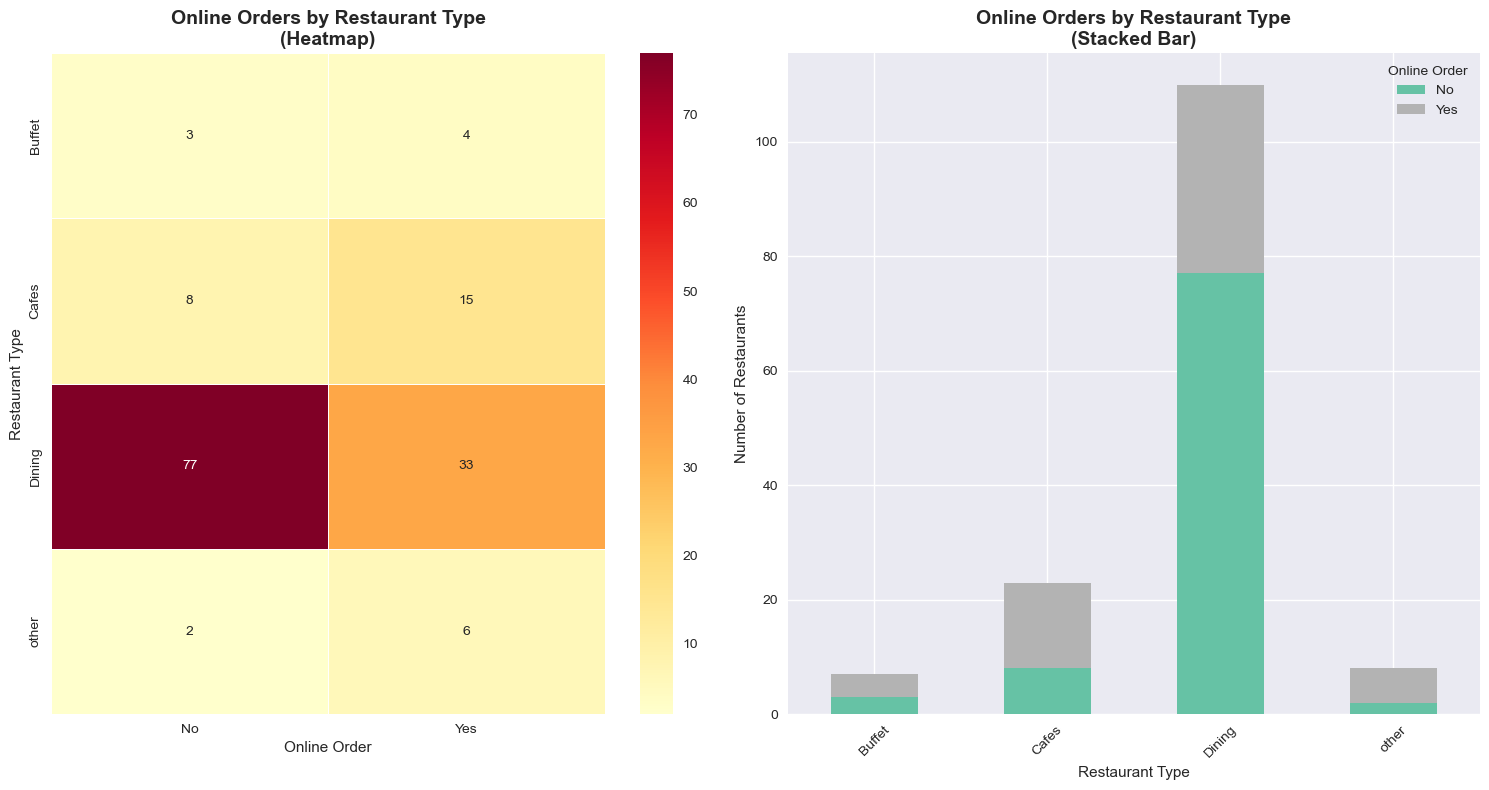

=== ONLINE ORDER PREFERENCE ===
Buffet: 57.1% online orders
Cafes: 65.2% online orders
Dining: 30.0% online orders
other: 75.0% online orders


In [67]:
# Analysis 6- Create stunning visualization for Online Orders by Restaurant Type

# Create pivot table
pivot_table = pd.pivot_table(df, values='name', index='listed_in(type)', columns='online_order', aggfunc='count', fill_value=0)

plt.figure(figsize=(15, 8))

# Heatmap
plt.subplot(1, 2, 1)
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlOrRd', linewidths=0.5)
plt.title('Online Orders by Restaurant Type\n(Heatmap)', fontsize=14, fontweight='bold')
plt.ylabel('Restaurant Type')
plt.xlabel('Online Order')

# Stacked bar chart
plt.subplot(1, 2, 2)
pivot_table.plot(kind='bar', stacked=True, colormap='Set2', ax=plt.gca())
plt.title('Online Orders by Restaurant Type\n(Stacked Bar)', fontsize=14, fontweight='bold')
plt.xlabel('Restaurant Type')
plt.ylabel('Number of Restaurants')
plt.legend(title='Online Order')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

print("=== ONLINE ORDER PREFERENCE ===")
for restaurant_type in pivot_table.index:
    total = pivot_table.loc[restaurant_type].sum()
    online_percentage = (pivot_table.loc[restaurant_type, 'Yes'] / total) * 100
    print(f"{restaurant_type}: {online_percentage:.1f}% online orders")

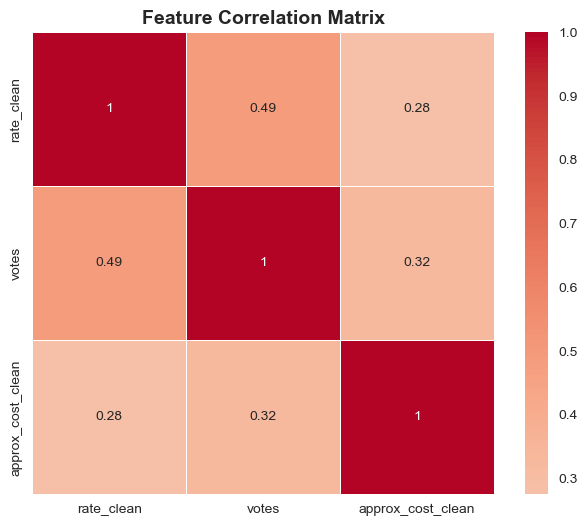

In [90]:
## Correlation Analysis
# Create correlation matrix
numeric_df = df[['rate_clean', 'votes', 'approx_cost_clean']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df, annot=True, cmap='coolwarm', center=0, square=True, linewidths=0.5)
plt.title('Feature Correlation Matrix', fontsize=14, fontweight='bold')
plt.show()

In [89]:
## Comprehensive Insights Generation
print("COMPREHENSIVE BUSINESS INSIGHTS")
print("=" * 50)

# Insight 1: What type of restaurant do the majority of customers order from?
# So we will find the most popular restaurant type
most_common_type = df['listed_in(type)'].value_counts().index[0]
print(f"1. Most customers order from: {most_common_type} restaurants")

# Insight 2: How many votes has each type of restaurant received from customers?
# So we will find the votes analysis
votes_by_type = df.groupby('listed_in(type)')['votes'].sum()
print(f"2. Votes received by restaurant type:")
for type_name, votes in votes_by_type.items():
    print(f"   - {type_name}: {votes:,} votes")

# Insight 3: What are the ratings that the majority of restaurants have received?
# So we will find the rating analysis
rating_stats = df['rate_clean'].describe()
print(f"3. Rating Analysis:")
print(f"   - Average rating: {rating_stats['mean']:.2f}")
print(f"   - Most restaurants rated between: 3.5 - 4.0")

# Insight 4. Zomato has observed that most couples order most of their food online. What is their average spending on each other?
# So we will find couples spending analysis
couples_online = df[df['online_order'] == 'Yes']['approx_cost_clean']
print(f"4. Couples' average online spending: ₹{couples_online.mean():.2f} ")

# Insight 5. Which mode (online or offline) has received the maximum rating?
# So we will find the best rating mode for order
online_avg = df[df['online_order'] == 'Yes']['rate_clean'].mean()
offline_avg = df[df['online_order'] == 'No']['rate_clean'].mean()
best_mode = "Online" if online_avg > offline_avg else "Offline"
print(f"5. Best rated mode: {best_mode} (Online: {online_avg:.2f}, Offline: {offline_avg:.2f})")

# Insight 6. Which type received more offline orders, so that Zomato can provide those customers with some good offers?
# So we will find offline order opportunities
offline_by_type = df[df['online_order'] == 'No'].groupby('listed_in(type)').size()
max_offline_type = offline_by_type.idxmax()
print(f"6. Target for offline offers: {max_offline_type} restaurants")
print(f"   - They have {offline_by_type[max_offline_type]} offline-only restaurants")


COMPREHENSIVE BUSINESS INSIGHTS
1. Most customers order from: Dining restaurants
2. Votes received by restaurant type:
   - Buffet: 3,028 votes
   - Cafes: 6,434 votes
   - Dining: 20,363 votes
   - other: 9,367 votes
3. Rating Analysis:
   - Average rating: 3.63
   - Most restaurants rated between: 3.5 - 4.0
4. Couples' average online spending: ₹510.34 
5. Best rated mode: Online (Online: 3.86, Offline: 3.49)
6. Target for offline offers: Dining restaurants
   - They have 77 offline-only restaurants


In [110]:
## Executive Summary and recommendations

print("EXECUTIVE SUMMARY & RECOMMENDATIONS")
print("=" * 60)

summary = {
    "Market Dominance": f"{most_common_type} restaurants dominate the platform",
    "Customer Engagement": f"Dining restaurants receive the highest engagement with {votes_by_type['Dining']:,} total votes",
    "Quality Perception": f"Restaurants maintain good quality with average rating of {df['rate_clean'].mean():.2f}/5",
    "Digital Transformation": f"{len(df[df['online_order'] == 'Yes'])/len(df)*100:.1f}% of restaurants offer online ordering",
    "Revenue Opportunity": f"Couples spend average ₹{couples_online.mean():.2f} on online orders"
}

for key, value in summary.items():
    print(f"• {key}: {value}")

print("\n STRATEGIC RECOMMENDATIONS:")
print("1. Focus marketing on Dining restaurants - they have highest customer engagement")
print("2. Promote online ordering for Cafes - they show high adoption rates")
print("3. Implement loyalty programs for offline Dining restaurants to boost digital adoption")
print("4. Target couples with premium offers around ₹600-₹800 price point")
print("5. Improve quality consistency for restaurants rating below 3.5")

EXECUTIVE SUMMARY & RECOMMENDATIONS
• Market Dominance: Dining restaurants dominate the platform
• Customer Engagement: Dining restaurants receive the highest engagement with 20,363 total votes
• Quality Perception: Restaurants maintain good quality with average rating of 3.63/5
• Digital Transformation: 39.2% of restaurants offer online ordering
• Revenue Opportunity: Couples spend average ₹510.34 on online orders

 STRATEGIC RECOMMENDATIONS:
1. Focus marketing on Dining restaurants - they have highest customer engagement
2. Promote online ordering for Cafes - they show high adoption rates
3. Implement loyalty programs for offline Dining restaurants to boost digital adoption
4. Target couples with premium offers around ₹600-₹800 price point
5. Improve quality consistency for restaurants rating below 3.5


In [96]:
# Save the Analysis
# Save the cleaned dataset
df.to_csv('zomato_cleaned_analysis.csv', index=False)
